In [44]:
import numpy as np
np.set_printoptions(threshold=np.nan, linewidth=115)
import pandas as pd
from collections import Counter
import pickle
import keras
from keras import models, optimizers, layers, regularizers
from keras.models import model_from_json
np.set_printoptions(threshold = np.nan, linewidth = 115)
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config = config)
import matplotlib.pyplot as plt
import glob
import random

TRAIN_LABEL_DIR = 'Data_Entry_2017.csv'
IMG_SIZE = 256

# Save Comparison model
def save_model(model_name, hist_str, model_str):

    pickle.dump(model_name.history, open('Training Histories/'+ hist_str + '.p', 'wb'))
    
    print("Saved " + hist_str + " to Training Histories folder")
    
    # serialize model to JSON
    model_name = model.to_json()
    with open("CNN Models/" + model_str + ".json", "w") as json_file:
        json_file.write(model_name)

    # serialize weights to HDF5
    model.save_weights("CNN Models/" + model_str + ".h5")
    print("Saved " + model_str + " and weights to CNN Models folder")

    
# Load model architecture and weights NOTE: must compile again
def load_model():
    model_str = str(input("Name of model to load: "))

    # load json and create model
    json_file = open('CNN Models/' + model_str + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("CNN Models/" + model_str + ".h5")
    print("Loaded " + model_str + " and weights from CNN Models folder")
    
    return loaded_model
    
# Load history object
def load_history():
    hist_str = str(input("Name of history to load: "))

    loaded_history = pickle.load(open('Training Histories/' + hist_str + '.p', 'rb'))
    
    print("Loaded " + hist_str + " from Training Histories folder")
    
    return loaded_history

# Metric Analysis
def true_accuracy(y_test, predictions):
    
    pred = np.round_(predictions)
    pred = pred.astype(dtype = 'uint8')
    
    ft = pred == y_test
    
    acc = []
    
    counter = 0
    while counter < len(ft):
        if sum(ft[counter]) < 15:
            acc.append(0)
            counter += 1
        else:
            acc.append(1)
            counter += 1
            
    # Accuracy       
    Acc = (sum(acc)/len(acc))
    
    print('\t Complete Label Accuracy: ', (Acc * 100), '%')
    
    print('Sum of Fully Correct Predictions: ', sum(acc))
    print('\t\t    Total Labels: ', len(acc))
    
    if Acc == 0:
        message = 'Feels Devastating (ﾉಥ益ಥ）ﾉ ┻━┻'
        
    elif Acc > 0 and Acc < 50:
        message = 'Feels Awful (੭ ˃̣̣̥ ㅂ˂̣̣̥)੭ु'
        
    elif Acc >= 50 and Acc < 60:
        message = 'Feels Bad (⌯˃̶᷄ ﹏ ˂̶᷄⌯)'
        
    elif Acc >= 60 and Acc < 70:
        message = 'Feels Meh... ┬─┬ノ(ಠ_ಠノ)'
    
    elif Acc >= 70 and Acc < 80:
        message = 'Feels Ok ʕ ·㉨·ʔ'
    
    elif Acc >= 80 and Acc < 90:
        message = 'Feels Better (^._.^)ﾉ'
        
    elif Acc >= 90 and Acc < 95:
        message = 'Feels Hopeful ( •́ ⍨ •̀)'
        
    elif Acc >= 95 and Acc < 98:
        message = 'Feels Good ヽ|･ω･|ゞ'
        
    elif Acc >= 98:
        message = 'Feels Great! ᕙ( * •̀ ᗜ •́ * )ᕗ'
        
    print('\n', message)
    
    return Acc

def show_img(array1, array2, index):
    plt.imshow(array1[index], cmap = 'gray')
    plt.title("{}".format(array2[index]))
    plt.show
    
read_data = pd.read_csv(TRAIN_LABEL_DIR)

image_num = []
for item in read_data.Image_Index:
    image_num.append(item)

train_num = image_num[11212:]
test_num = image_num[:11212]

In [15]:
# Load with pickle instead of processing images again
training_img_1 = pickle.load(open('training_img_resampled_1st_half.p', 'rb'))
training_img_2 = pickle.load(open('training_img_resampled_2nd_half.p', 'rb'))
training_img = np.append(training_img_1, training_img_2, axis = 0)

training_labels_1 = pickle.load(open('training_labels_resampled_1st_half.p', 'rb'))
training_labels_2 = pickle.load(open('training_labels_resampled_2nd_half.p', 'rb'))
training_labels = np.append(training_labels_1, training_labels_2, axis = 0)

In [2]:
test_img = pickle.load(open('pickle_test_img.p', 'rb'))

test_labels = pickle.load(open('test_labels.p', 'rb'))

# Compare Models

In [3]:
# Optional: load model architecture
model = load_model()
model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['categorical_accuracy'])

Name of model to load: baseline_v7_20e
Loaded baseline_v7_20e and weights from CNN Models folder


In [46]:
# Predict
predictions = model.predict(test_img)

In [49]:
print(predictions[0])

[0.05630674 0.16581358 0.01570205 0.00372654 0.1457774  0.04054387 0.0261921  0.00101935 0.19959912 0.06644231
 0.18664032 0.14503808 0.03754981 0.02799687 0.04506316]


In [53]:
sum = 0
for num in predictions[3]:
    sum += num
sum

1.4626041122246534

In [47]:
accuracy = true_accuracy(test_labels, predictions)

	 Complete Label Accuracy:  13.646093471280771 %
Sum of Fully Correct Predictions:  1530
		    Total Labels:  11212

 Feels Awful (੭ ˃̣̣̥ ㅂ˂̣̣̥)੭ु


In [6]:
show_preds = np.round_(predictions)
show_preds = predictions.astype(dtype='uint8')

In [7]:
print(show_preds)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 

In [8]:
print(test_labels)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 

In [40]:
ft = show_preds == test_labels
acc = []

counter = 0
while counter < len(ft):
    if sum(ft[counter]) < 15:
        acc.append(0)
        counter += 1
    else:
        acc.append(1)
        counter += 1
        
#print(acc)
Acc = (sum(acc)/len(acc))
print(Acc)

0.0


#### Evaluate

In [9]:
model_test = model.evaluate(test_img, test_labels)
print(model_test)

11212/11212 [==============================] - 8s 732us/step
[0.21472982974550872, 0.4420264002960408]


In [34]:
squeezed_img = np.squeeze(test_img, axis = -1)
squeezed_img.shape

(11212, 256, 256)

In [35]:
image_index = 11211

In [36]:
print(squeezed_img[image_index])

[[208 208 209 209 210 210 211 212 212 212 212 212 213 213 213 212 213 213 213 213 212 212 213 213 212 213 212 213
  213 212 212 212 213 213 213 212 212 212 212 212 212 211 211 211 211 211 211 212 211 212 212 211 211 212 211 211
  211 211 211 211 213 210 210 211 210 210 211 211 211 210 211 211 211 211 211 211 211 212 212 212 212 212 211 211
  210 222 220 222 224 227 229 229 230 230 231 231 232 233 233 234 234 234 235 236 235 237 237 238 238 238 238 239
  239 240 240 240 241 241 242 241 242 241 241 241 241 241 241 241 241 241 242 241 241 241 241 242 240 241 241 241
  240 241 240 241 240 240 239 238 239 238 238 238 237 237 237 237 237 236 235 236 235 235 234 234 233 233 232 232
  231 231 230 229 228 228 227 227 226 226 225 224 223 221 218 215 208 208 209 209 209 209 209 209   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


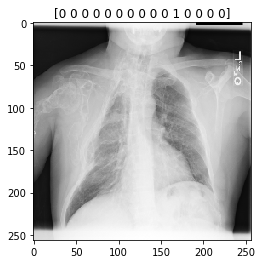

In [38]:
print(show_preds[image_index])
show_img(squeezed_img, training_labels, image_index)

In [ ]:
# Plot Results Compared To Baseline

base_acc = base_hist['val_categorical_accuracy']
model_acc = model_history['val_categorical_accuracy']
epochs = range(1, len(model_acc) + 1)
plt.plot(epochs, base_acc, 'b', label='Dropouts Model Acc')
plt.plot(epochs, model_acc, 'r', label='Version 2 Acc')
plt.title('Validation Categorical Accuracies')
plt.legend()
plt.figure()

plt.show()
# Optional: save plot
#Todo

base_loss = base_hist['val_loss']
model_loss = model_history['val_loss']
plt.plot(epochs, base_loss, 'b', label='VGG Model loss')
plt.plot(epochs, model_loss, 'r', label='Version 2 loss')
plt.title('Validation Losses')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

plt.show()

### Compare Two Models

In [ ]:
# Optional: load model to see summary and/or compile for evaluation
loaded_model = load_model()
loaded_model.summary()

In [ ]:
loaded_model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_test = loaded_model.predict(test_img)
print(model_test)

#cohen_kappa_score(test_labels, np.round_(loaded_model.predict(test_img)))

In [ ]:
# Optional: load history to plot and compare models
loaded_hist = load_history()

model_history = load_history()

#### Plot Validation Accuracies & Losses

In [ ]:
loaded_acc = loaded_hist['val_acc']
model_acc = model_history['val_acc']
epochs = range(1, len(model_acc) + 1)
plt.plot(epochs, loaded_acc, 'b', label='Loaded Model Acc')
plt.plot(epochs, model_acc, 'r', label='Trained Model Acc')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

loaded_loss = loaded_hist['val_loss']
model_loss = model_history['val_loss']
plt.plot(epochs, loaded_loss, 'b', label='Loaded Model loss')
plt.plot(epochs, model_loss, 'r', label='Trained Model loss')
plt.title('Comparison of Validation Losses')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

plt.show()

In [ ]:
arr = np.array([[[0, 1], [2, 3]], [[4, 5], [6, 7]]])
arr

In [ ]:
arr.shape

In [ ]:
arr = arr.reshape((2, 4))
arr

In [ ]:
arr = np.reshape(arr, (2, 2, 2))
arr

In [ ]:
arr.shape